In [1]:
Saving = False
import CoreFunctions as cf
import numpy as np
import matplotlib.pyplot as plt
import platform

In [2]:
HostName = platform.node()

if HostName == "Server":
    Computer = "Desktop"   
elif HostName[-6:] == 'wm.edu':
    Computer = "SciClone"
elif HostName == "SchoolLaptop":
    Computer = "LinLap"
elif HostName == "WTC-TAB-512":
    Computer = "PortLap"
else:
    Computer = "WinLap"
    
if Computer == "SciClone":
    file = '60kPoints-220111-1554-s2.csv'
elif Computer == "WinLap":
    file = 'fail'
elif Computer == "Desktop":
    file = '60kPoints-220208-1138-s3.csv'
elif Computer == "LinLap":
    file = 'fail'
elif Computer == 'PortLap':
    file = '60kPoints-210916-0418-s1.csv'

In [3]:
Move = cf.getAcceleration(file)

In [4]:
Move = Move[0][2]

In [5]:
Move = cf.KalmanFilterDenoise(Move)

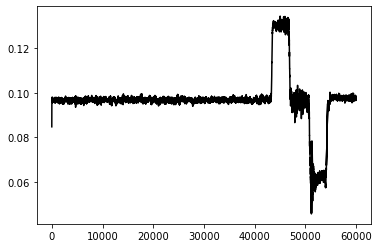

In [6]:
fig = plt.figure()
plt.plot(Move)
plt.show()

In [7]:
MTD = Move[0:5000]

In [8]:
scales = 1000
scalespace = 5
coefs = cf.cwt_fixed_scipy(MTD, scales, 'beta', scalespace)

OSError: [Errno 30] Read-only file system: '/sciclone/home20/dchendrickson01/image/testing.png'

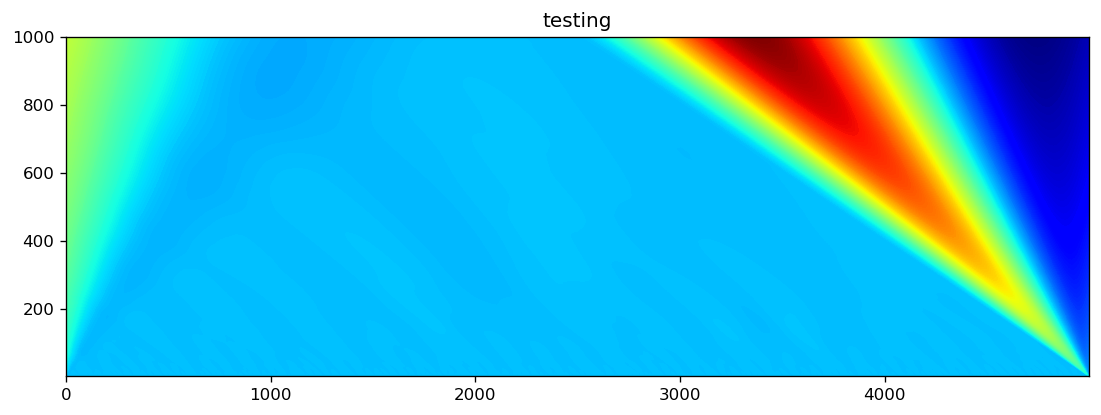

In [9]:
h = cf.PlotColorScales([coefs, 'testing'])

In [10]:
beta_a = 2
beta_b = 5
beta_cycles = 4
beta_sineCosine = 1
betaParameters = [10000, beta_a,  beta_b, beta_cycles, 0]
int_psi, x = cf.BetaWavelet(betaParameters[0], betaParameters[1], betaParameters[2], betaParameters[3], betaParameters[4])

In [11]:
scales = scales = np.r_[1:scales+1] * scalespace

In [12]:
step = x[1] - x[0]


<function matplotlib.pyplot.show(close=None, block=None)>

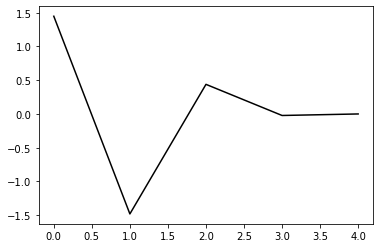

In [13]:
i = 0
j = np.floor(
    np.arange(scales[i] * (x[-1] - x[0]) + 1) / (scales[i] * step))
if np.max(j) >= np.size(int_psi):
    j = np.delete(j, np.where((j >= np.size(int_psi)))[0])
fig = plt.figure()
plt.plot(int_psi[j.astype(int)][::-1])
plt.show

In [14]:
WaveShapes = []
for i in range(np.size(scales)):
    j = np.floor(
        np.arange(scales[i] * (x[-1] - x[0]) + 1) / (scales[i] * step))
    if np.max(j) >= np.size(int_psi):
        j = np.delete(j, np.where((j >= np.size(int_psi)))[0])
    WaveShapes.append(int_psi[j.astype(int)][::-1])

In [15]:
np.shape(WaveShapes)

/sciclone/home20/dchendrickson01/.conda/envs/visvis_tfcgpu/lib/python3.9/site-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(1000,)

In [16]:
class StreamingWavelet:
    def __init__(self, scale, wavelet, scalespace =1, sampling_period=1., betaParameters = [10000, beta_a,  beta_b, beta_cycles, 0],data=[]):
        self.WaveShape, self.x = cf.BetaWavelet(betaParameters[0], betaParameters[1], betaParameters[2], betaParameters[3], betaParameters[4])
        self.scales  = np.r_[1:scale+1] * scalespace
        self.step = x[1] - x[0]
        self.WaveShapes = []
        self.data = data
        for i in range(np.size(self.scales)):
            j = np.floor(
                np.arange(scales[i] * (x[-1] - x[0]) + 1) / (scales[i] * step))
            if np.max(j) >= np.size(int_psi):
                j = np.delete(j, np.where((j >= np.size(int_psi)))[0])
            self.WaveShapes.append(int_psi[j.astype(int)][::-1])
        return None
    
    def AddDataPoint(self, data, coefs):
        results = []
        product = []
        for i in range(np.size(data)):
            if np.size(self.data) == 0:
                self.data = np.matrix(data[0:1])
            else:
                self.data = np.concatenate((self.data,np.matrix(data[i])),axis=0)
            for wave in self.WaveShapes:
                lw = np.size(wave) #np.size(data)<lw:)
                if np.size(data)<lw:
                    pad = np.zeros(lw - np.size(self.data))
                    compare = np.concatenate((pad,self.data),axis=0)
                else:
                    compare = self.data    
                product.append(np.dot(wave, compare[-np.size(wave):]))
            product = np.matrix(product).T
            results.append(product)
        results = np.matrix(results)
        if coefs == []:
            co = results
        else:
            co = np.concatenate((np.matrix(coefs),results), axis = 0)
        return co


In [17]:
WvtBuilder = StreamingWavelet(1000, 'beta', 5)

In [18]:
coefs=WvtBuilder.AddDataPoint(Move[0:1000],[])

ValueError: shapes (5,) and (1,1) not aligned: 5 (dim 0) != 1 (dim 0)

In [ ]:
coefs = WvtBuilder.AddDataPoint(Move[0:5],coefs)


In [ ]:
pad = np.zeros((np.size(WvtBuilder.WaveShapes[0]) - np.size(WvtBuilder.data),1))

In [ ]:
h = np.concatenate((pad,WvtBuilder.data),axis=0)

In [ ]:
np.dot(WvtBuilder.WaveShapes[0],h)

In [ ]:
np.size(h)

In [ ]:
pad = np.zeros(8)

In [ ]:
g = np.concatenate((pad,h),axis=0)

In [ ]:
g

In [ ]:
np.dot(WvtBuilder.WaveShapes[2],g[-np.size(WvtBuilder.WaveShapes[2]):])


In [ ]:
import matplotlib.animation as animation

Spacing = 4
ZoomSize = 200
Step = int(ZoomSize/Spacing)
Length = np.shape(FpScat)[1]
Frames = int(Length/ZoomSize)*Spacing - Spacing + 2

y = np.linspace(0, scales, scales)
x = np.linspace(0, ZoomSize, ZoomSize)
x,y = np.meshgrid(x,y)

fig = plt.figure(plt.figure(figsize=(6.67,3.75)),dpi=600)

def animate(i):
    coefs = WvtBuilder.AddDataPoint(Move[i:i+5000],coefs)
    z = np.matrix(FpScat[:,start:end])
    plt.title('Data Points ' +str(start) + ' : ' + str(end))
    cont = plt.contourf(x, y, z, levels=scales, cmap='gray',vmin=-100, vmax=100)
    #time.sleep(1)
    return cont  

anim = animation.FuncAnimation(fig, animate, frames=30)

anim.save('animation.gif')